In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [55]:
dtrain = pd.read_csv('C:\\EstudosML\\ML distribuído\\UNSW-N15\\Dataset\\UNSW_NB15_training-set.csv')

Text(0.5, 1.0, 'class distribution of train dataset')

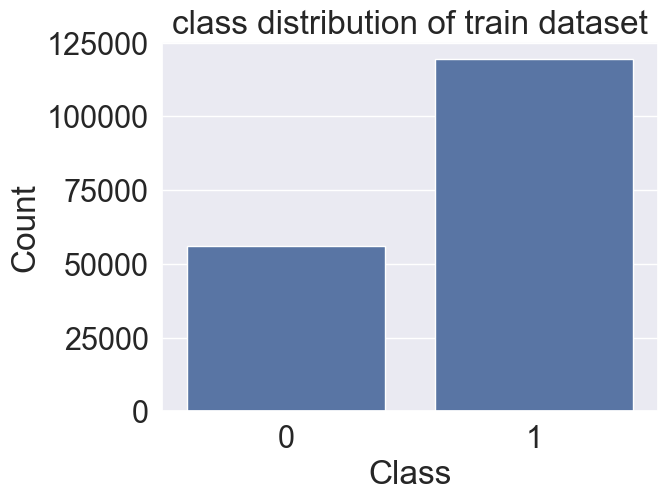

In [56]:
dist = sns.countplot(x='label', data=dtrain)
dist.set(xlabel="Class", ylabel="Count")
plt.title("class distribution of train dataset")

In [57]:

# Verificar a contagem de classes na coluna alvo (substitua 'target' pelo nome da sua coluna alvo)
class_counts = dtrain['label'].value_counts()

# Imprimir a contagem de cada classe
print("Contagem de cada classe:")
print(class_counts)

Contagem de cada classe:
1    119341
0     56000
Name: label, dtype: int64


In [58]:
dtrain.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [59]:
#Verificando valores nulos
dtrain.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [60]:
#Verificando valores nulos
dtrain.isnull().sum().sum()

0

In [61]:
#selecionando todos os valores '-'
dtrain[dtrain['service']=='-']

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175125,175126,0.653375,tcp,-,FIN,10,8,564,354,26.018748,...,1,1,0,0,0,18,1,0,Reconnaissance,1
175179,175180,0.695566,tcp,-,FIN,10,8,564,354,24.440528,...,1,1,0,0,0,3,1,0,Reconnaissance,1
175191,175192,0.962856,tcp,-,FIN,24,60,1256,59374,86.201883,...,1,1,0,0,0,1,1,0,Exploits,1
175277,175278,3.719110,tcp,-,FIN,66,340,3086,426483,108.897021,...,1,1,0,0,0,2,1,0,Exploits,1


In [62]:
#Substituindo os '-' por NaN
dtrain['service'].replace('-',np.nan,inplace=True)

In [63]:
dtrain.isnull().sum()

id                       0
dur                      0
proto                    0
service              94168
state                    0
spkts                    0
dpkts                    0
sbytes                   0
dbytes                   0
rate                     0
sttl                     0
dttl                     0
sload                    0
dload                    0
sloss                    0
dloss                    0
sinpkt                   0
dinpkt                   0
sjit                     0
djit                     0
swin                     0
stcpb                    0
dtcpb                    0
dwin                     0
tcprtt                   0
synack                   0
ackdat                   0
smean                    0
dmean                    0
trans_depth              0
response_body_len        0
ct_srv_src               0
ct_state_ttl             0
ct_dst_ltm               0
ct_src_dport_ltm         0
ct_dst_sport_ltm         0
ct_dst_src_ltm           0
i

In [64]:
dtrain.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,NaN,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,NaN,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,NaN,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,NaN,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [65]:
dtrain.shape

(175341, 45)

In [66]:
#Retirar os NaN
dtrain.dropna(inplace=True)

In [67]:
dtrain.shape

(81173, 45)

In [68]:
#dtrain = dtrain.drop(columns=['id'])
#dtrain = dtrain.drop(columns=['attack_cat'])

In [69]:
dtrain.tail()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
175335,175336,0.000006,udp,dns,INT,2,0,114,0,166666.6608,...,17,45,0,0,0,33,45,0,Generic,1
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.1072,...,13,24,0,0,0,24,24,0,Generic,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.1072,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.1072,...,14,30,0,0,0,30,30,0,Generic,1
175340,175341,0.000009,udp,dns,INT,2,0,114,0,111111.1072,...,16,30,0,0,0,30,30,0,Generic,1


In [70]:
#One hot encoding

#selecionando e separando dados numericos e dados categorigos

num_col = dtrain.select_dtypes(include='number').columns

# selecting categorical data attributes
cat_col = dtrain.columns.difference(num_col)
cat_col = cat_col[1:] ########
cat_col

Index(['proto', 'service', 'state'], dtype='object')

In [71]:
# creating a dataframe with only categorical attributes
data_cat = dtrain[cat_col].copy()
data_cat.head()

,proto,service,state
3,tcp,ftp,FIN
11,tcp,smtp,FIN
15,udp,snmp,INT
17,tcp,http,FIN
21,tcp,http,FIN


In [72]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [73]:
data_cat.head()

,proto_tcp,proto_udp,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
11,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
15,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
17,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
21,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [74]:
data_cat.shape

(81173, 19)

In [75]:
dtrain.shape

(81173, 45)

In [76]:
dtrainf = pd.concat([dtrain, data_cat],axis=1)

In [77]:
dtrainf.shape

(81173, 64)

In [78]:
dtrainf.drop(columns=cat_col,inplace=True)

In [79]:
dtrainf.shape

(81173, 61)

Text(0.5, 1.0, 'class distribution of train dataset')

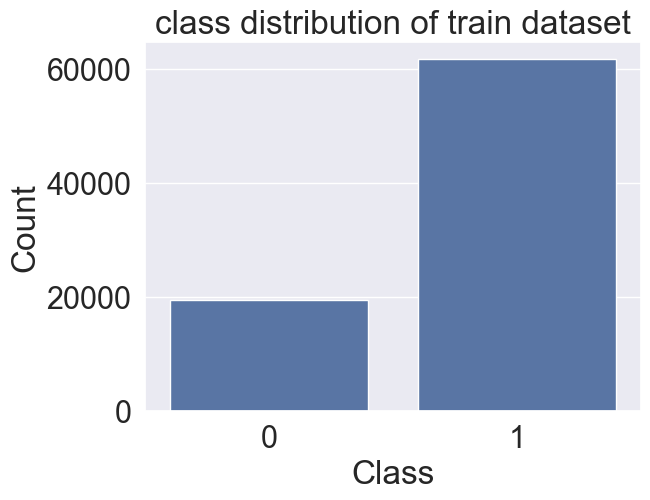

In [80]:
dist = sns.countplot(x='label', data=dtrainf)
dist.set(xlabel="Class", ylabel="Count")
plt.title("class distribution of train dataset")

In [81]:
class_counts = dtrainf['label'].value_counts()
print(class_counts)

1    61685
0    19488
Name: label, dtype: int64


In [29]:
dtrainf.tail()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
175335,175336,0.000006,2,0,114,0,166666.6608,254,0,76000000.0,...,0,0,0,0,0,0,0,1,0,0
175336,175337,0.000009,2,0,114,0,111111.1072,254,0,50666664.0,...,0,0,0,0,0,0,0,1,0,0
175338,175339,0.000009,2,0,114,0,111111.1072,254,0,50666664.0,...,0,0,0,0,0,0,0,1,0,0
175339,175340,0.000009,2,0,114,0,111111.1072,254,0,50666664.0,...,0,0,0,0,0,0,0,1,0,0
175340,175341,0.000009,2,0,114,0,111111.1072,254,0,50666664.0,...,0,0,0,0,0,0,0,1,0,0


In [30]:
len(dtrainf)

81173

In [31]:
dtrainf.columns

Index(['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label',
       'proto_tcp', 'proto_udp', 'service_dhcp', 'service_dns', 'service_ftp',
       'service_ftp-data', 'service_http', 'service_irc', 'service_pop3',
       'service_radius', 'service_smtp', 'service_snmp', 'service_ssh',
       'service_ssl', 'state_CON', 'state_FIN', 'state_INT', 'state_REQ',
       'state_RST'],
      dtype='object')

In [32]:
#normalização
# selecting numeric attributes columns from data
num_col = list(dtrainf.select_dtypes(include='number').columns)
num_col.remove('label')
num_col.remove('id')
print(num_col)

['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'proto_tcp', 'proto_udp', 'service_dhcp', 'service_dns', 'service_ftp', 'service_ftp-data', 'service_http', 'service_irc', 'service_pop3', 'service_radius', 'service_smtp', 'service_snmp', 'service_ssh', 'service_ssl', 'state_CON', 'state_FIN', 'state_INT', 'state_REQ', 'state_RST']


In [33]:
# using minmax scaler for normalizing data
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [34]:
dtfinal = dtrainf

In [35]:
dtfinal.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,...,0,0,0,0,0,0,1,0,0,0
11,12,2.093085,62,28,56329,2212,42.520967,62,252,2.118251e+05,...,0,1,0,0,0,0,1,0,0,0
15,16,0.000002,2,0,138,0,500000.001300,254,0,2.760000e+08,...,0,0,1,0,0,0,0,1,0,0
17,18,0.393556,10,8,860,1096,43.195886,62,252,1.573347e+04,...,0,0,0,0,0,0,1,0,0,0
21,22,0.338017,10,6,998,268,44.376468,254,252,2.127704e+04,...,0,0,0,0,0,0,1,0,0,0


In [36]:
dtfinal = normalization(dtfinal.copy(), num_col)

In [37]:
dtfinal.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,2.802780e-02,0.001144,0.001093,0.000041,0.000053,0.000014,0.138393,0.992126,0.000001,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11,12,3.488529e-02,0.006344,0.002551,0.004337,0.000151,0.000043,0.138393,0.992126,0.000092,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15,16,1.666693e-08,0.000104,0.000000,0.000003,0.000000,0.500000,0.995536,0.000000,0.119792,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17,18,6.559354e-03,0.000936,0.000729,0.000059,0.000075,0.000043,0.138393,0.992126,0.000007,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21,22,5.633690e-03,0.000936,0.000547,0.000069,0.000018,0.000044,0.995536,0.992126,0.000009,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [38]:
dtfinal.tail()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
175335,175336,8.333466e-08,0.000104,0.0,0.000001,0.0,0.166667,0.995536,0.0,0.032986,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
175336,175337,1.333355e-07,0.000104,0.0,0.000001,0.0,0.111111,0.995536,0.0,0.021991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
175338,175339,1.333355e-07,0.000104,0.0,0.000001,0.0,0.111111,0.995536,0.0,0.021991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
175339,175340,1.333355e-07,0.000104,0.0,0.000001,0.0,0.111111,0.995536,0.0,0.021991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
175340,175341,1.333355e-07,0.000104,0.0,0.000001,0.0,0.111111,0.995536,0.0,0.021991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [39]:
num_col.append('label')

In [40]:
print(num_col)

['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'proto_tcp', 'proto_udp', 'service_dhcp', 'service_dns', 'service_ftp', 'service_ftp-data', 'service_http', 'service_irc', 'service_pop3', 'service_radius', 'service_smtp', 'service_snmp', 'service_ssh', 'service_ssl', 'state_CON', 'state_FIN', 'state_INT', 'state_REQ', 'state_RST', 'label']


In [41]:
dtfinal = dtfinal.drop(columns=['id'])

C:\Users\natha\AppData\Local\Temp\ipykernel_2684\97208320.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dtfinal.corr()


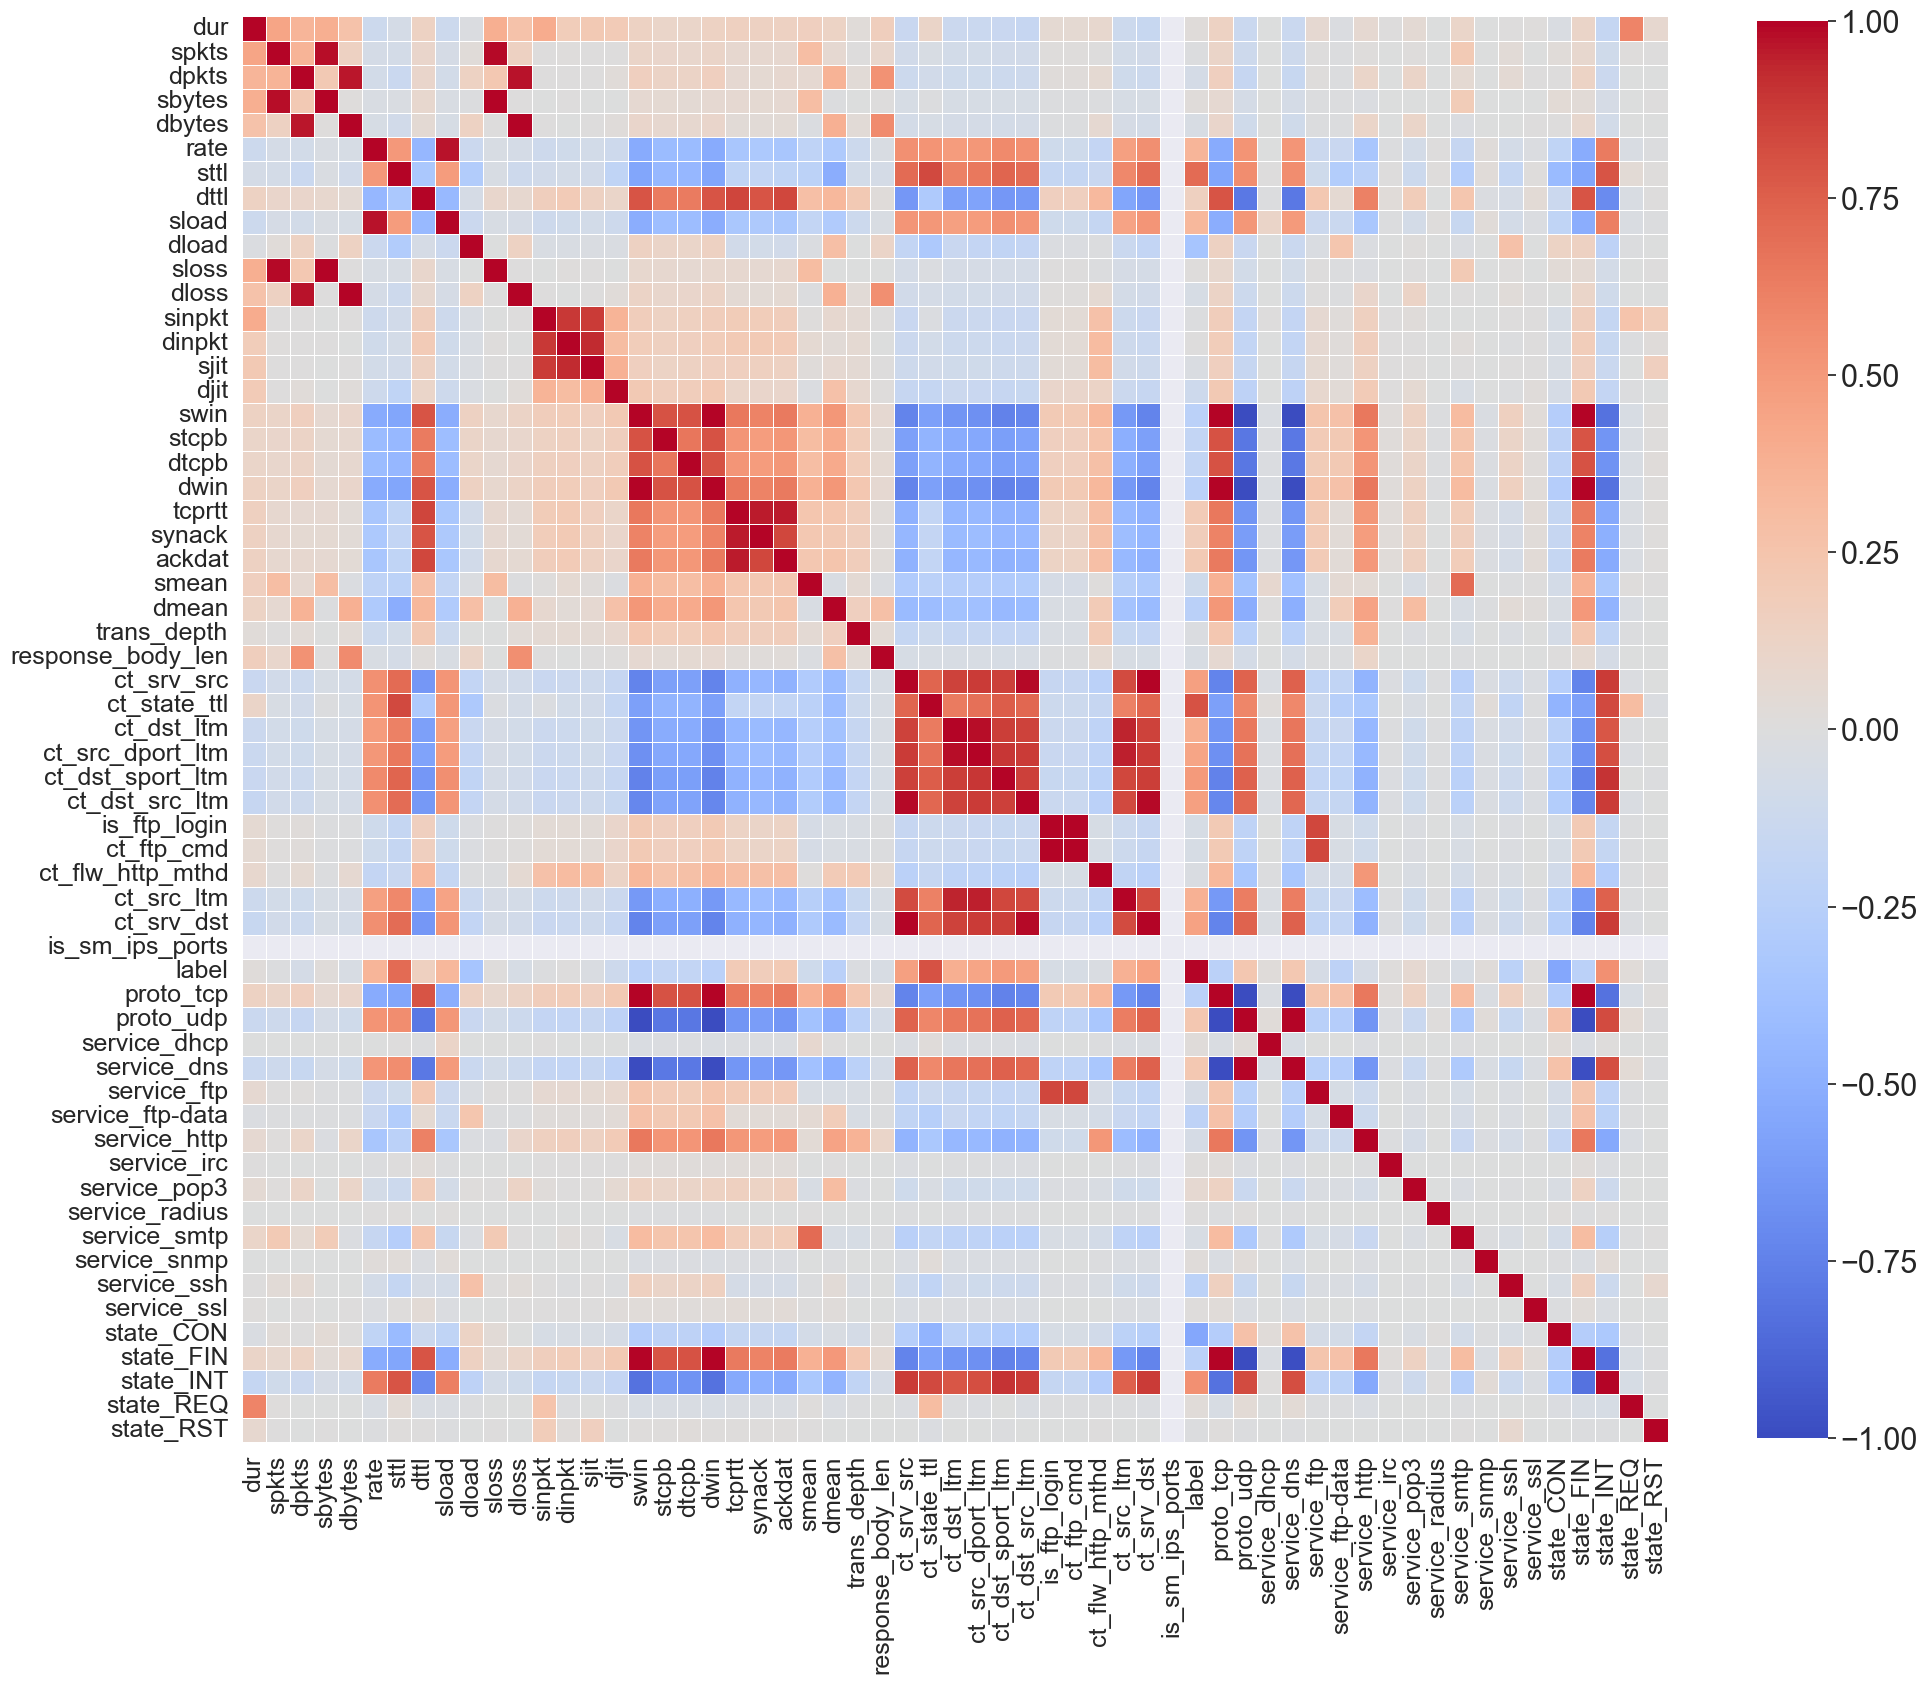

<Figure size 640x480 with 0 Axes>

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a matriz de correlação
correlation_matrix = dtfinal.corr()

plt.figure(figsize=(23, 23))  # Aumentar o tamanho da figura para comportar todas as labels
sns.set(font_scale=2.0)  # Ajustar o tamanho da fonte se necessário

heatmap = sns.heatmap(
    correlation_matrix,
    annot=False,                # Remove as anotações dos valores nas células
    cmap='coolwarm',            # Paleta de cores
    vmin=-1, vmax=1,            # Limites da barra de cores
    center=0,                   # Centro da paleta de cores
    square=True,                # Células quadradas
    linewidths=0.5,             # Largura das linhas entre as células
    cbar_kws={"shrink": 0.8},   # Configuração da barra de cores
    xticklabels=correlation_matrix.columns,  # Exibir todos os labels das colunas
    yticklabels=correlation_matrix.columns   # Exibir todos os labels das linhas
)

# Ajuste final do tamanho da fonte dos eixos
plt.xticks(fontsize=18, rotation=90)  # Rotaciona as labels do eixo X para 90º
plt.yticks(fontsize=18)
plt.show()
plt.savefig('correlationmatrix.png')

In [43]:
categorical_columns = dtfinal.select_dtypes(include=['object', 'category']).columns
print("Colunas Categóricas:")
print(categorical_columns)

Colunas Categóricas:
Index(['attack_cat'], dtype='object')


In [46]:
print(list(dtfinal.columns))

['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label', 'proto_tcp', 'proto_udp', 'service_dhcp', 'service_dns', 'service_ftp', 'service_ftp-data', 'service_http', 'service_irc', 'service_pop3', 'service_radius', 'service_smtp', 'service_snmp', 'service_ssh', 'service_ssl', 'state_CON', 'state_FIN', 'state_INT', 'state_REQ', 'state_RST']


In [53]:
dtfinal.shape[1]

59

In [54]:

# Verificar a contagem de classes na coluna alvo (substitua 'target' pelo nome da sua coluna alvo)
class_counts = dtfinal['label'].value_counts()

# Imprimir a contagem de cada classe
print("Contagem de cada classe:")
print(class_counts)

Contagem de cada classe:
0    61685
1    61685
Name: label, dtype: int64


In [48]:
#Balanceamento

dtfinal= dtfinal.drop('attack_cat', axis=1)

from imblearn.over_sampling import SMOTE
# Separar os preditores (features) das classes alvo
X = dtfinal.drop('label', axis=1)  # Excluindo a coluna 'label' para obter apenas os preditores
y = dtfinal['label']  # A coluna 'label' contém as classes alvo

# Instanciar o SMOTE
smote = SMOTE(k_neighbors=5, random_state=42)

# Aplicar o SMOTE para balancear as classes
X_resampled, y_resampled = smote.fit_resample(X, y)

# Converter os dados balanceados em DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['label'])  # Se 'label' for o nome da sua coluna alvo

# Juntar os dados balanceados em um novo DataFrame
balanced_data = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Verificar as dimensões do novo DataFrame
print("Dimensões do DataFrame balanceado:", balanced_data.shape)

# Exibir as primeiras linhas do novo DataFrame
print(balanced_data.head())

c:\Users\natha\Documents\AgentesML\python\ai_runner\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\natha\Documents\AgentesML\python\ai_runner\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


Dimensões do DataFrame balanceado: (123370, 59)
            dur     spkts     dpkts    sbytes    dbytes      rate      sttl  \
0  2.802780e-02  0.001144  0.001093  0.000041  0.000053  0.000014  0.138393   
1  3.488529e-02  0.006344  0.002551  0.004337  0.000151  0.000043  0.138393   
2  1.666693e-08  0.000104  0.000000  0.000003  0.000000  0.500000  0.995536   
3  6.559354e-03  0.000936  0.000729  0.000059  0.000075  0.000043  0.138393   
4  5.633690e-03  0.000936  0.000547  0.000069  0.000018  0.000044  0.995536   

       dttl     sload     dload  ...  service_smtp  service_snmp  service_ssh  \
0  0.992126  0.000001  0.000150  ...           0.0           0.0          0.0   
1  0.992126  0.000092  0.000364  ...           1.0           0.0          0.0   
2  0.000000  0.119792  0.000000  ...           0.0           1.0          0.0   
3  0.992126  0.000007  0.000869  ...           0.0           0.0          0.0   
4  0.992126  0.000009  0.000236  ...           0.0           0.0        

In [49]:
dtfinal = balanced_data

In [50]:
# finding the attributes which have more than 0.3 correlation with encoded attack label attribute 
corr_ybin = abs(corr_bin['label'])
highest_corr_bin = corr_ybin[corr_ybin > 0.3]
highest_corr_bin.sort_values(ascending=True)

sload               0.334562
dload               0.343910
rate                0.344535
ct_src_ltm          0.368486
ct_dst_ltm          0.387358
ct_src_dport_ltm    0.444874
ct_srv_dst          0.459984
ct_srv_src          0.463153
ct_dst_src_ltm      0.463735
ct_dst_sport_ltm    0.497234
state_INT           0.546631
state_CON           0.552505
sttl                0.707337
ct_state_ttl        0.801403
label               1.000000
Name: label, dtype: float64

In [51]:
# selecting attributes found by using pearson correlation coefficient
bin_cols = highest_corr_bin.index
bin_cols

Index(['rate', 'sttl', 'sload', 'dload', 'ct_srv_src', 'ct_state_ttl',
       'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'ct_src_ltm', 'ct_srv_dst', 'state_CON', 'state_INT', 'label'],
      dtype='object')

In [52]:
# Binary labelled Dataset
dtf = dtfinal[bin_cols].copy()
dtf

,rate,sttl,sload,dload,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_src_ltm,ct_srv_dst,state_CON,state_INT,label
0,0.000014,0.138393,0.000001,0.000150,0.000000,0.166667,0.020000,0.0,0.0,0.039216,0.016949,0.000000,0.0,0.0,0
1,0.000043,0.138393,0.000092,0.000364,0.019608,0.166667,0.000000,0.0,0.0,0.019608,0.000000,0.000000,0.0,0.0,0
2,0.500000,0.995536,0.119792,0.000000,0.000000,0.333333,0.000000,0.0,0.0,0.058824,0.016949,0.000000,0.0,1.0,0
3,0.000043,0.138393,0.000007,0.000869,0.039216,0.166667,0.000000,0.0,0.0,0.019608,0.000000,0.039216,0.0,0.0,0
4,0.000044,0.995536,0.000009,0.000236,0.098039,0.166667,0.000000,0.0,0.0,0.000000,0.016949,0.039216,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123365,0.000369,0.000000,0.000057,0.007805,0.000000,0.000000,0.005649,0.0,0.0,0.005539,0.014363,0.014069,0.0,0.0,0
123366,0.000343,0.000000,0.000469,0.004336,0.000000,0.000000,0.071312,0.0,0.0,0.028125,0.103919,0.000000,0.0,0.0,0
123367,0.000018,0.138393,0.000003,0.000370,0.039216,0.166667,0.000000,0.0,0.0,0.039216,0.003094,0.039216,0.0,0.0,0
123368,0.002707,0.000000,0.000224,0.028198,0.000000,0.000000,0.080000,0.0,0.0,0.000000,0.002845,0.000000,1.0,0.0,0


In [250]:
dtf.to_csv('dadostreino.csv')

In [ ]:
dtf.tail()